# Training the ML model with Eigen Images

<b>Import required libraries<b>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
#warnings.filters('ignore')

%matplotlib inline

<b>Load Data<b>

In [3]:
data = np.load('./Data/Data_pca_50_y_mean.pickle.npz')

In [4]:
data.files

['arr_1', 'arr_0', 'arr_2']

In [5]:
X = data['arr_0']
y= data['arr_1']
mean = data['arr_2']

<b>Split Data into train and test set<b>

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4083, 50), (4083,), (1361, 50), (1361,))

<b>Train ML model using SVM algorithm<b>

In [9]:
from sklearn.svm import SVC

In [15]:
model = SVC(C=1.0,kernel='rbf',gamma=0.01,probability=True)

In [16]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

<b>Check model performance<b>

In [17]:
model.score(X_train,y_train)

0.6044575067352437

In [18]:
model.score(X_test,y_test)

0.6054371785451874

<b>Model Evaluation<b>

In [20]:
from sklearn import metrics

In [21]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

<b>Confusion Matrix<b>

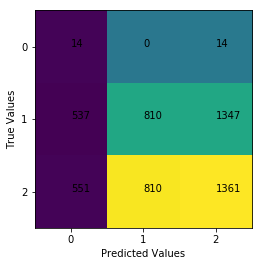

In [31]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)
conf_mat = np.concatenate((conf_mat,conf_mat.sum(axis=0).reshape(1,-1)),axis=0)
conf_mat = np.concatenate((conf_mat,conf_mat.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(conf_mat)

for i in range(3):
    for j in range(3):
        plt.text(i,j,'%d'%conf_mat[i,j])
        
plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [27]:
conf_mat

array([[  14,  537,  551],
       [   0,  810,  810],
       [  14, 1347, 1361]], dtype=int64)

<b>Classification Report<b>

In [33]:
cr = metrics.classification_report(y_test,y_pred,target_names=['Male','Female'],output_dict=True)

In [34]:
df_cr = pd.DataFrame(cr)

In [35]:
df_cr

,Female,Male,accuracy,macro avg,weighted avg
f1-score,0.751043,0.049558,0.605437,0.400300,0.467047
precision,0.601336,1.000000,0.605437,0.800668,0.762735
recall,1.000000,0.025408,0.605437,0.512704,0.605437
support,810.000000,551.000000,0.605437,1361.000000,1361.000000


In [37]:
df_cr.transpose()

,f1-score,precision,recall,support
Female,0.751043,0.601336,1.000000,810.000000
Male,0.049558,1.000000,0.025408,551.000000
accuracy,0.605437,0.605437,0.605437,0.605437
macro avg,0.400300,0.800668,0.512704,1361.000000
weighted avg,0.467047,0.762735,0.605437,1361.000000


<b>Calculate Kappa Score<b>

In [38]:
metrics.cohen_kappa_score(y_test,y_pred)

0.0300980575605444

<b>ROC and AUC<b>